# MENG 37100 - Problem Set 4

In [150]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from qutip.measurement import measure, measurement_statistics
from qutip.qip.operations import rx
from qutip.qip.operations import controlled_gate
from qutip.qip.circuit import Gate
from mpl_toolkits.mplot3d.axes3d import Axes3D

## 2c) (c)

In [18]:
#J<<dB
J=0.1
Bz=500
dB=100

spincoupling=J/4*(tensor(sigmax(),sigmax())+tensor(sigmay(),sigmay())+tensor(sigmaz(),sigmaz()))-J/4
H=spincoupling+1/2*Bz*(tensor(qeye(2),sigmaz())+tensor(sigmaz(),qeye(2)))+1/2*dB*(tensor(qeye(2),sigmaz())-tensor(sigmaz(),qeye(2)))

values, vecs = H.eigenstates()

In [20]:
values

array([-500.       , -100.0500125,   99.9500125,  500.       ])

We get one eigenvalue that's -Bz, one that's -dB, one that's +dB, and one that's Bz which matches the result from 2c(b).

In [21]:
vecs

array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
       Qobj data =
       [[0.]
        [0.]
        [0.]
        [1.]]                                                             ,
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
       Qobj data =
       [[ 0.00000000e+00]
        [ 9.99999969e-01]
        [-2.49999977e-04]
        [ 0.00000000e+00]]                                                ,
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
       Qobj data =
       [[0.00000000e+00]
        [2.49999977e-04]
        [9.99999969e-01]
        [0.00000000e+00]]                                                 ,
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
       Qobj data =
       [[1.]
        [0.]
        [0.]
        [0.]]                                                             ],
      dtype=object)

The -Bz eigenvalue corresponds to $|\uparrow \uparrow \rangle$, the -dB eigenvalue corresponds to $|\uparrow \downarrow \rangle$, the +dB eigenvalue corresponds to $|\downarrow \uparrow \rangle$, and the +Bz eigenvalue corresponds to $|\downarrow \downarrow \rangle$.

## 3e) 

In [168]:
psi_ini = tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,0))

#first single qubit gates
sg1 = tensor(qeye(2),rx(np.pi/1.65),rx(np.pi/2),rx(np.pi/2))
psi_1 = sg1*psi_ini
#print(psi_1[0:8])

#first controlled gate
cno=ket2dm(basis(2,0))
cyes=ket2dm(basis(2,1))
#only do rotation if |111>
#cgate=tensor(rx(2*np.pi),cyes,cyes,cyes)+tensor(qeye(2),tensor(qeye(2),qeye(2),qeye(2))-tensor(cyes,cyes,cyes))
cgate=-tensor(rx(2*np.pi),cyes,cyes,cyes)-tensor(qeye(2),tensor(qeye(2),qeye(2),qeye(2))-tensor(cyes,cyes,cyes))
psi_2=cgate*psi_1
#print(psi_2[0:8])

#more single qubit gates
sg2=tensor(qeye(2),qeye(2),rx(np.pi/4),rx(np.pi/2))
psi_3=sg2*psi_2
#print(psi_3[0:8])

#second and third control gate
#only do rotation if |100>
#cgate2 = tensor(rx(2*np.pi),cyes,cno,cno)+tensor(qeye(2),tensor(qeye(2),qeye(2),qeye(2))-tensor(cyes,cno,cno))
cgate2= -tensor(rx(2*np.pi),cyes,cno,cno)-tensor(qeye(2),tensor(qeye(2),qeye(2),qeye(2))-tensor(cyes,cno,cno))
psi_4=cgate*cgate2*psi_3
#print(psi_4[0:8])

#last single qubit gate
sg3 = tensor(qeye(2),qeye(2),rx(np.pi/4),qeye(2))
psi_fin=sg3*psi_4
psi_fin=np.real(psi_fin[0:8]) #dont care about electron spin
psi_fin

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.58005691],
       [0.        ],
       [0.57599218],
       [0.57599218],
       [0.        ]])

This is the state |110>+|101>+|011> normed.

## 3f)

C:\Users\rsdey\AppData\Local\Temp\ipykernel_15844\2406750498.py:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\rsdey\AppData\Local\Temp\ipykernel_15844\2406750498.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_xaxis.set_ticklabels(xnames)
C:\Users\rsdey\AppData\Local\Temp\ipykernel_15844\2406750498.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_yaxis.set_ticklabels(ynames)


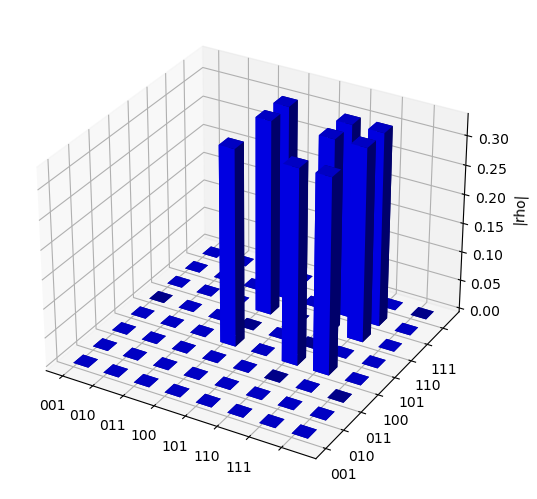

In [174]:
x = np.arange(0,8)
y = np.arange(0,8)
xnames=["000","001","010","011","100","101","110","111"]
ynames=xnames

xs, ys = np.meshgrid(x, y)

def densval(i,j):
    return np.real(densitymatrix[j][0][i])

densval=np.vectorize(densval)

zs = densval(xs,ys)

xpos = xs.flatten() 
ypos = ys.flatten()
zpos = np.zeros(64)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = zs.flatten()

fig = plt.figure()
ax1 = plt.axes(projection ='3d')

ax = Axes3D(fig)
#ax.plot_surface(xs, ys, zs)
ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color='b')
ax.axes.set_zlim3d(bottom=0, top=0.33) 
ax.w_xaxis.set_ticklabels(xnames)
ax.w_yaxis.set_ticklabels(ynames)
ax.set_zlabel('|rho|')

plt.show()